# Pandas profiling

In [1]:
import pandas as pd
import pandas_profiling

In [2]:
data=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
pr=data.profile_report()

In [5]:
pr.to_file('./pr_report.html')

In [6]:
pr

# 텍스트 전처리

## 1) 토큰화

In [7]:
from nltk.tokenize import word_tokenize  
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))  

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [8]:
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [9]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [10]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text="Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


In [11]:
from nltk.tokenize import sent_tokenize
text="His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [12]:
from nltk.tokenize import sent_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [13]:
from nltk.tokenize import word_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [14]:
from nltk.tag import pos_tag
x=word_tokenize(text)
pos_tag(x)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

### 한국어 tokenizer

In [15]:
# kss
import kss
text='딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요.', '농담아니에요.', '이제 해보면 알걸요?']


In [16]:
# Okt
from konlpy.tag import Okt  
okt=Okt()  
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [17]:
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


In [18]:
# 꼬꼬마
from konlpy.tag import Kkma  
kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [19]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [20]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

['코딩', '당신', '연휴', '여행']


In [21]:
#MeCab
import MeCab
m=MeCab.Tagger()
out=m.parse("미캅이 잘 설치되었는지 확인중입니다.")
print(out)

미	NNP,인명,F,미,*,*,*,*
캅	NNP,인명,T,캅,*,*,*,*
이	JKS,*,F,이,*,*,*,*
잘	MAG,*,T,잘,*,*,*,*
설치	NNG,행위,F,설치,*,*,*,*
되	XSV,*,F,되,*,*,*,*
었	EP,*,T,었,*,*,*,*
는지	EC,*,F,는지,*,*,*,*
확인	NNG,행위,T,확인,*,*,*,*
중	NNB,*,T,중,*,*,*,*
입니다	VCP+EF,*,F,입니다,Inflect,VCP,EF,이/VCP/*+ᄇ니다/EF/*
.	SF,*,*,*,*,*,*,*
EOS



# 길이가 짧은 단어 제거

In [22]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


# 표제어 추출

In [23]:
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([n.lemmatize(w) for w in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [24]:
n.lemmatize('dies', 'v')

'die'

In [25]:
n.lemmatize('watched', 'v')

'watch'

In [26]:
n.lemmatize('has', 'v')

'have'

# 어간 추출

In [27]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()
text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words=word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [28]:
print([s.stem(w) for w in words])

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [29]:
words=['formalize', 'allowance', 'electricical']
print([s.stem(w) for w in words])

['formal', 'allow', 'electric']


In [30]:
from nltk.stem import PorterStemmer
s=PorterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [31]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


# 불용어 : 의미 분석하는데 큰 도움이 안되는 친구들

In [32]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10]  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

print(word_tokens) 
print(result) 

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


## 한국어에서 불용어 제거

In [34]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


보편적으로 사용 가능한 한국어 불용어 리스트(링크 아래)

https://www.ranks.nl/stopwords/korean

# 정규표현식

In [35]:
import re
r=re.compile("a.c") #.: 한 개의 임의의 문자.
r.search("kkk") # 아무런 결과도 출력되지 않는다.

In [36]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [37]:
import re
r=re.compile("ab?c") # ?: ? 앞에 문자가 존재할 수도, 아닐수도 있는 경우.
r.search("abbc") # 아무런 결과도 출력되지 않는다.

In [38]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [39]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [40]:
import re
r=re.compile("ab*c") # *: 바로 앞의 문자가 0개 이상일 경우.
r.search("a") # 아무런 결과도 출력되지 않는다.

In [41]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [42]:
r.search("abc") 

<re.Match object; span=(0, 3), match='abc'>

In [43]:
r.search("abbbbc") 

<re.Match object; span=(0, 6), match='abbbbc'>

In [44]:
import re
r=re.compile("ab+c") # +: 바로 앞의 문자가 1개 이상일 경우.
r.search("ac") # 아무런 결과도 출력되지 않는다.

In [45]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [46]:
r.search("abbbbc") 

<re.Match object; span=(0, 6), match='abbbbc'>

In [47]:
import re
r=re.compile("^a") # ^: 시작되는 글자를 지정.
r.search("bbc") # 아무런 결과도 출력되지 않는다.

In [48]:
r.search("ab")    

<re.Match object; span=(0, 1), match='a'>

In [49]:
import re
r=re.compile("ab{2}c") # {숫자} : 문자 앞에 이걸 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냄.
r.search("ac") # 아무런 결과도 출력되지 않는다. 
r.search("abc") # 아무런 결과도 출력되지 않는다.

In [50]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [51]:
r.search("abbbbbc") # 아무런 결과도 출력되지 않는다.

In [52]:
import re
r=re.compile("ab{2,8}c") # {숫자1, 숫자2} : 문자 뒤에 이걸 붙이면, 해당 문자를 숫자1 이상 숫자2 이하만큼 반복.
r.search("ac") # 아무런 결과도 출력되지 않는다.
r.search("abc") # 아무런 결과도 출력되지 않는다.

In [53]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [54]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [55]:
r.search("abbbbbbbbbc")

In [56]:
import re
r=re.compile("a{2,}bc") # {숫자,} : 문자 뒤에 붙이면 해당 문자를 숫자 이상만큼 반복.
r.search("bc") # 아무런 결과도 출력되지 않는다.
r.search("aa") # 아무런 결과도 출력되지 않는다.

In [57]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [58]:
r.search("aaaaaaaabc")

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

In [59]:
import re
r=re.compile("[abc]") # [abc]는 [a-c]와 같다. []: 이 안에 문자를 넣으면, 그 문자들 중 한개의 문자와 매치라는 의미.
r.search("zzz") # 아무런 결과도 출력되지 않는다.

In [60]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [61]:
r.search("aaaaaaa")

<re.Match object; span=(0, 1), match='a'>

In [62]:
r.search("baac")      

<re.Match object; span=(0, 1), match='b'>

In [63]:
import re
r=re.compile("[a-z]")
r.search("AAA") # 아무런 결과도 출력되지 않는다.

In [64]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

In [65]:
r.search("111") # 아무런 결과도 출력되지 않는다.

In [66]:
import re
r=re.compile("[^abc]") # [^문자]: ^ 이거 뒤에 붙은 문자들을 제외한 모든 문자를 매치.
r.search("a") # 아무런 결과도 출력되지 않는다.
r.search("ab") # 아무런 결과도 출력되지 않는다.
r.search("b") # 아무런 결과도 출력되지 않는다.

In [67]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [68]:
r.search("1")   

<re.Match object; span=(0, 1), match='1'>

In [69]:
import re
r=re.compile("ab.")

In [70]:
r.search("kkkabc")  

<re.Match object; span=(3, 6), match='abc'>

In [71]:
r.match("kkkabc")  #아무런 결과도 출력되지 않는다.

In [72]:
r.match("abckkk")  

<re.Match object; span=(0, 3), match='abc'>

In [73]:
import re
text="사과 딸기 수박 메론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '메론', '바나나']

In [74]:
import re
text="""사과
딸기
수박
메론
바나나"""
re.split("\n",text)

['사과', '딸기', '수박', '메론', '바나나']

In [75]:
import re
text="사과+딸기+수박+메론+바나나"
re.split("\+",text)
['사과', '딸기', '수박', '메론', '바나나']  

['사과', '딸기', '수박', '메론', '바나나']

In [76]:
import re
text="""이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""  
re.findall("\d+",text)

['010', '1234', '1234', '30']

In [77]:
re.findall("\d+", "문자열입니다.")

[]

In [78]:
import re
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]',' ',text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

In [79]:
import re  

text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""  

re.split('\s+', text)  

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [80]:
re.findall('\d+',text)  

['100', '101', '102']

re.findall('[A-Z]',text)

In [81]:
re.findall('[A-Z]{4}',text)  

['PROF', 'STUD', 'STUD']

In [82]:
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

In [83]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [84]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\s]+", gaps=True)
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


# 정수 인코딩

In [85]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [86]:
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [87]:
# 문장 토큰화
text = sent_tokenize(text)
print(text)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [88]:
# 정제와 단어 토큰화
vocab = {} # 파이썬의 dictionary 자료형
sentences = []
stop_words = set(stopwords.words('english'))

for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result) 
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [89]:
print(vocab)

{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [90]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [91]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [92]:
# 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여
word_to_index = {}
i=0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [93]:
vocab_size = 5
words_frequency = [w for w,c in word_to_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [94]:
word_to_index['OOV'] = len(word_to_index) + 1

In [95]:
encoded = []
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


In [96]:
from collections import Counter

In [97]:
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [98]:
words = sum(sentences, [])
# 위 작업은 words = np.hstack(sentences)로도 수행 가능.
print(words)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [99]:
vocab = Counter(words) # 파이썬의 Counter 모듈을 이용하면 단어의 모든 빈도를 쉽게 계산할 수 있습니다.
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [100]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [101]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [102]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [103]:
from nltk import FreqDist
import numpy as np

In [104]:
# np.hstack으로 문장 구분을 제거하여 입력으로 사용 . ex) ['barber', 'person', 'barber', 'good' ... 중략 ...
vocab = FreqDist(np.hstack(sentences))

In [105]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [106]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [107]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [108]:
test=['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test): # 입력의 순서대로 0부터 인덱스를 부여함.
    print("value : {}, index: {}".format(value, index))

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


In [109]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [110]:
sentences=[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [111]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.

In [112]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [113]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [114]:
print(tokenizer.texts_to_sequences(sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [115]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(sentences)

In [116]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [117]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [118]:
print(tokenizer.texts_to_sequences(sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [119]:
tokenizer = Tokenizer() # num_words를 여기서는 지정하지 않은 상태
tokenizer.fit_on_texts(sentences)

In [120]:
vocab_size = 5
words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제
print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [121]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
# 빈도수 상위 5개 단어만 사용. 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(sentences)

In [122]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [123]:
print(tokenizer.texts_to_sequences(sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


# 패딩

In [124]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [125]:
sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [126]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.

In [127]:
encoded = tokenizer.texts_to_sequences(sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [128]:
max_len = max(len(item) for item in encoded)
print(max_len)

7


In [129]:
for item in encoded: # 각 문장에 대해서
    while len(item) < max_len:   # max_len보다 작으면
        item.append(0)

padded_np = np.array(encoded)
padded_np # 숫자 0을 사용하고 있다면 제로 패딩(zero padding)

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [130]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
encoded = tokenizer.texts_to_sequences(sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [132]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

In [133]:
padded = pad_sequences(encoded, padding = 'post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [134]:
(padded == padded_np).all()

True

In [135]:
padded = pad_sequences(encoded, padding = 'post', maxlen = 5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]])

In [136]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [137]:
padded = pad_sequences(encoded, padding = 'post', value = last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

# one-hot encoding

In [138]:
from konlpy.tag import Okt  
okt=Okt()  
token=okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [139]:
word2index={}
for voca in token:
     if voca not in word2index.keys():
        word2index[voca]=len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [140]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index=word2index[word]
    one_hot_vector[index]=1
    return one_hot_vector

In [141]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

In [142]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text="나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [143]:
sub_text="점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded=t.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [144]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


# 데이터 분리

In [145]:
X,y = zip(['a', 1], ['b', 2], ['c', 3])
print(X)
print(y)

('a', 'b', 'c')
(1, 2, 3)


In [146]:
sequences=[['a', 1], ['b', 2], ['c', 3]] # 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
X,y = zip(*sequences) # *를 추가
print(X)
print(y)

('a', 'b', 'c')
(1, 2, 3)


In [147]:
import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [148]:
X=df['메일 본문']
y=df['스팸 메일 유무']

In [149]:
print(X)

0          당신에게 드리는 마지막 혜택!
1      내일 뵐 수 있을지 확인 부탁드...
2      도연씨. 잘 지내시죠? 오랜만입...
3    (광고) AI로 주가를 예측할 수 있다!
Name: 메일 본문, dtype: object


In [150]:
print(y)

0    1
1    0
2    0
3    1
Name: 스팸 메일 유무, dtype: int64


In [151]:
import numpy as np
ar = np.arange(0,16).reshape((4,4))
print(ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [152]:
X=ar[:, :3]
print(X)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]


In [153]:
y=ar[:,3]
print(y)

[ 3  7 11 15]


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [155]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
print(X)
print(list(y)) #레이블 데이터

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
#3분의 1만 test 데이터로 지정.
#random_state 지정으로 인해 순서가 섞인 채로 훈련 데이터와 테스트 데이터가 나눠진다.

In [157]:
print(X_train)
print(X_test)

[[2 3]
 [4 5]
 [6 7]]
[[8 9]
 [0 1]]


In [158]:
print(y_train)
print(y_test)

[1, 2, 3]
[4, 0]


In [159]:
import numpy as np
X, y = np.arange(0,24).reshape((12,2)), range(12)
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성

In [160]:
print(X)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]


In [161]:
print(list(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [162]:
n_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
n_of_test = int(len(X) - n_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print(n_of_train)
print(n_of_test)

9
3


In [163]:
X_test = X[n_of_train:] #전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[n_of_train:] #전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:n_of_train] #전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:n_of_train] #전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [164]:
print(X_test)
print(list(y_test))

[[18 19]
 [20 21]
 [22 23]]
[9, 10, 11]


# 한국어 전처리 패키지

In [165]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [166]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [167]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [168]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [169]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [170]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('내 최애돌 샤이니 소속 이태민 강남구청에서 모범납세자 상 받아'))

['내', '최애', '돌', '샤이니', '소속', '이태민', '강남', '구청', '에서', '모범', '납세', '자', '상', '받아']


In [171]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [172]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x21dd6bcb7c8>)

In [173]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [174]:
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
    i = i+1
    if i == 3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [175]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 2.021 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


In [176]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [177]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [178]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [179]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [180]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

In [181]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [182]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [183]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [184]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

In [185]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

In [186]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

In [187]:
from soynlp.normalizer import *

In [188]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [189]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


In [190]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [191]:
twitter.add_dictionary('은경이', 'Noun')

In [192]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']

# BoW

In [193]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [194]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [196]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [197]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [198]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# TF-IDF

In [199]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [200]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [201]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [202]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [203]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [204]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [205]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [207]:
tfidfv.transform(corpus).toarray()

array([[0.        , 0.46735098, 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.35543247, 0.46735098],
       [0.        , 0.        , 0.79596054, 0.        , 0.        ,
        0.        , 0.        , 0.60534851, 0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ]])

# 벡터의 유사도

In [208]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [209]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [210]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


In [211]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [212]:
data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [213]:
data = data.head(20000)

In [214]:
data['overview'].isnull().sum()

135

In [215]:
# overview에서 Null 값을 가진 경우에는 Null 값을 제거
data['overview'] = data['overview'].fillna('')

In [216]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

(20000, 47487)


In [217]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [218]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [219]:
idx = indices['Father of the Bride Part II']
print(idx)

4


In [220]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [221]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

In [222]:
import numpy as np
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print(dist(doc1,docQ))
print(dist(doc2,docQ))
print(dist(doc3,docQ))

2.23606797749979
3.1622776601683795
2.449489742783178


In [223]:
# 다음과 같은 두 개의 문서가 있습니다.
# 두 문서 모두에서 등장한 단어는 apple과 banana 2개.
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화를 수행합니다.
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

# 토큰화 결과 출력
print(tokenized_doc1)
print(tokenized_doc2)

['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [224]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)

{'holder', 'like', 'love', 'card', 'banana', 'apple', 'you', 'coupon', 'passport', 'likey', 'watch', 'everyone'}


In [225]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

{'banana', 'apple'}


In [226]:
print(len(intersection)/len(union)) # 2를 12로 나눔.

0.16666666666666666


# 토픽 모델링

In [227]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

(4, 9)

In [228]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [229]:
print(U.round(2))
np.shape(U)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


(4, 4)

In [230]:
print(s.round(2))
np.shape(s)

[2.69 2.05 1.73 0.77]


(4,)

In [231]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

In [232]:
print(VT.round(2))
np.shape(VT)

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

In [233]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

In [234]:
S=S[:2,:2]
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


In [235]:
U=U[:,:2]
print(U.round(2))

[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


In [236]:
VT=VT[:2,:]
print(VT.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [237]:
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.    0.    0.    0.  ]]


In [238]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [239]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [240]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [241]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [242]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [243]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [244]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


In [245]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [246]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

(11314, 1000)

In [248]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [249]:
np.shape(svd_model.components_)

(20, 1000)

In [250]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

In [251]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [252]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [253]:
print(dictionary[66])

faith


In [254]:
len(dictionary)

64281

In [255]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"simms" + 0.015*"cover" + 0.010*"copies" + 0.009*"vram"')
(1, '0.012*"file" + 0.009*"windows" + 0.008*"program" + 0.007*"software"')
(2, '0.019*"insurance" + 0.013*"kent" + 0.013*"mask" + 0.012*"cheers"')
(3, '0.033*"drive" + 0.027*"scsi" + 0.015*"period" + 0.013*"drives"')
(4, '0.011*"jesus" + 0.008*"people" + 0.007*"jews" + 0.007*"israel"')
(5, '0.009*"scope" + 0.007*"astros" + 0.007*"networking" + 0.007*"neck"')
(6, '0.028*"wire" + 0.026*"ground" + 0.019*"cable" + 0.019*"circuit"')
(7, '0.013*"char" + 0.012*"ripem" + 0.008*"theory" + 0.005*"remark"')
(8, '0.010*"said" + 0.008*"people" + 0.007*"time" + 0.007*"know"')
(9, '0.025*"card" + 0.019*"price" + 0.013*"sale" + 0.012*"apple"')
(10, '0.063*"space" + 0.022*"nasa" + 0.014*"launch" + 0.012*"satellite"')
(11, '0.023*"would" + 0.016*"like" + 0.012*"know" + 0.011*"think"')
(12, '0.012*"navy" + 0.011*"cubs" + 0.010*"nist" + 0.009*"john"')
(13, '0.023*"game" + 0.021*"team" + 0.018*"year" + 0.016*"games"')
(14, '0.071*"output"

In [256]:
print(ldamodel.print_topics())

[(0, '0.017*"simms" + 0.015*"cover" + 0.010*"copies" + 0.009*"vram" + 0.009*"slots" + 0.008*"centris" + 0.008*"green" + 0.008*"quadra" + 0.007*"simm" + 0.006*"appears"'), (1, '0.012*"file" + 0.009*"windows" + 0.008*"program" + 0.007*"software" + 0.007*"system" + 0.007*"using" + 0.007*"available" + 0.007*"files" + 0.007*"version" + 0.006*"also"'), (2, '0.019*"insurance" + 0.013*"kent" + 0.013*"mask" + 0.012*"cheers" + 0.010*"maine" + 0.010*"expose" + 0.009*"speakers" + 0.009*"paid" + 0.008*"mydisplay" + 0.007*"stereo"'), (3, '0.033*"drive" + 0.027*"scsi" + 0.015*"period" + 0.013*"drives" + 0.012*"disk" + 0.011*"power" + 0.010*"hard" + 0.009*"play" + 0.008*"controller" + 0.006*"second"'), (4, '0.011*"jesus" + 0.008*"people" + 0.007*"jews" + 0.007*"israel" + 0.007*"christian" + 0.006*"would" + 0.006*"bible" + 0.005*"world" + 0.005*"church" + 0.005*"believe"'), (5, '0.009*"scope" + 0.007*"astros" + 0.007*"networking" + 0.007*"neck" + 0.007*"corp" + 0.007*"ingr" + 0.007*"glutamate" + 0.006*

In [257]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [258]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(4, 0.31675482), (18, 0.66871107)]
1 번째 문서의 topic 비율은 [(4, 0.35204163), (9, 0.033008393), (11, 0.566765), (19, 0.027110768)]
2 번째 문서의 topic 비율은 [(4, 0.3483666), (8, 0.13721222), (11, 0.31153953), (13, 0.036089994), (15, 0.051317465), (18, 0.103769325)]
3 번째 문서의 topic 비율은 [(8, 0.13375065), (9, 0.044285767), (11, 0.30118102), (17, 0.42059773), (18, 0.08826278)]
4 번째 문서의 topic 비율은 [(11, 0.21668226), (13, 0.28697523), (18, 0.46483505)]


In [259]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [260]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,18.0,0.6687,"[(4, 0.31679532), (18, 0.66867054)]"
1,1,11.0,0.5668,"[(4, 0.3520459), (9, 0.033008575), (11, 0.5667..."
2,2,4.0,0.3483,"[(4, 0.34829977), (8, 0.13714226), (11, 0.3115..."
3,3,17.0,0.4206,"[(8, 0.13377312), (9, 0.04428387), (11, 0.3011..."
4,4,18.0,0.4648,"[(11, 0.21672373), (13, 0.286958), (18, 0.4648..."
5,5,4.0,0.7072,"[(4, 0.7072116), (11, 0.2518572)]"
6,6,11.0,0.4513,"[(1, 0.29882917), (5, 0.014781059), (8, 0.0272..."
7,7,11.0,0.3716,"[(2, 0.10198422), (4, 0.15742712), (8, 0.16098..."
8,8,16.0,0.3973,"[(8, 0.24314815), (11, 0.23437981), (16, 0.397..."
9,9,11.0,0.4469,"[(2, 0.08693006), (8, 0.20707308), (9, 0.09963..."


In [1]:
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", filename="abcnews-date-text.csv")
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
print(len(data))

1082168


In [3]:
print(data.head(5))

   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers


In [4]:
text = data[['headline_text']]
text.head(5)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [5]:
import nltk
text['headline_text']=text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [6]:
print(text.head(5))

                                       headline_text
0  [aba, decides, against, community, broadcastin...
1  [act, fire, witnesses, must, be, aware, of, de...
2  [a, g, calls, for, infrastructure, protection,...
3  [air, nz, staff, in, aust, strike, for, pay, r...
4  [air, nz, strike, to, affect, australian, trav...


In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop)])

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [8]:
print(text.head(5))

                                       headline_text
0   [aba, decides, community, broadcasting, licence]
1    [act, fire, witnesses, must, aware, defamation]
2     [g, calls, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


In [9]:
from nltk.stem import WordNetLemmatizer
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                       headline_text
0       [aba, decide, community, broadcast, licence]
1      [act, fire, witness, must, aware, defamation]
2      [g, call, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [10]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [11]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc # 다시 text['headline_text']에 재저장

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [12]:
text['headline_text'][:5]

0       decide community broadcast licence
1       fire witness must aware defamation
2    call infrastructure protection summit
3                   staff aust strike rise
4      strike affect australian travellers
Name: headline_text, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(text['headline_text'])
X.shape # TF-IDF 행렬의 크기 확인

(1082168, 1000)

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)

In [15]:
lda_top=lda_model.fit_transform(X)

In [16]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[1.00001533e-01 1.00001269e-01 1.00004179e-01 ... 1.00006124e-01
  1.00003111e-01 1.00003064e-01]
 [1.00001199e-01 1.13513398e+03 3.50170830e+03 ... 1.00009349e-01
  1.00001896e-01 1.00002937e-01]
 [1.00001811e-01 1.00001151e-01 1.00003566e-01 ... 1.00002693e-01
  1.00002061e-01 7.53381835e+02]
 ...
 [1.00001065e-01 1.00001689e-01 1.00003278e-01 ... 1.00006721e-01
  1.00004902e-01 1.00004759e-01]
 [1.00002401e-01 1.00000732e-01 1.00002989e-01 ... 1.00003517e-01
  1.00001428e-01 1.00005266e-01]
 [1.00003427e-01 1.00002313e-01 1.00007340e-01 ... 1.00003732e-01
  1.00001207e-01 1.00005153e-01]]
(10, 1000)


In [17]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('government', 8725.19), ('sydney', 8393.29), ('queensland', 7720.12), ('change', 5874.27), ('home', 5674.38)]
Topic 2: [('australia', 13691.08), ('australian', 11088.95), ('melbourne', 7528.43), ('world', 6707.7), ('south', 6677.03)]
Topic 3: [('death', 5935.06), ('interview', 5924.98), ('kill', 5851.6), ('jail', 4632.85), ('life', 4275.27)]
Topic 4: [('house', 6113.49), ('2016', 5488.19), ('state', 4923.41), ('brisbane', 4857.21), ('tasmania', 4610.97)]
Topic 5: [('court', 7542.74), ('attack', 6959.64), ('open', 5663.0), ('face', 5193.63), ('warn', 5115.01)]
Topic 6: [('market', 5545.86), ('rural', 5502.89), ('plan', 4828.71), ('indigenous', 4223.4), ('power', 3968.26)]
Topic 7: [('charge', 8428.8), ('election', 7561.63), ('adelaide', 6758.36), ('make', 5658.99), ('test', 5062.69)]
Topic 8: [('police', 12092.44), ('crash', 5281.14), ('drug', 4290.87), ('beat', 3257.58), ('rise', 2934.92)]
Topic 9: [('fund', 4693.03), ('labor', 4047.69), ('national', 4038.68), ('council', 40

# 자동미분

In [18]:
import tensorflow as tf

In [19]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [20]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [21]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [23]:
@tf.function
def hypothesis(x):
    return W*x + b

In [24]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [25]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [26]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [27]:
optimizer = tf.optimizers.SGD(0.01)

In [28]:
for i in range(301):
    with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [29]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [31]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
9/9 [==============================] - 0s 1ms/step - loss: 410.0172 - mse: 410.0172
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3597 - mse: 2.3597
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3516 - mse: 2.3516
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3438 - mse: 2.3438
Epoch 5/300
9/9 [==============================] - 0s 997us/step - loss: 2.3364 - mse: 2.3364
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3292 - mse: 2.3292
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3224 - mse: 2.3224
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3158 - mse: 2.3158
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3095 - mse: 2.3095
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3035 - mse: 2.3035
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 2

Epoch 174/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1466 - mse: 2.1466
Epoch 175/300
9/9 [==============================] - 0s 997us/step - loss: 2.1466 - mse: 2.1466
Epoch 176/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1466 - mse: 2.1466
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 178/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 179/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 180/300
9/9 [==============================] - 0s 997us/step - loss: 2.1465 - mse: 2.1465
Epoch 181/300
9/9 [==============================] - 0s 997us/step - loss: 2.1465 - mse: 2.1465
Epoch 182/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 183/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1464 - mse: 2.1464
Epoch 184/300
9/9 [==============================] - 0

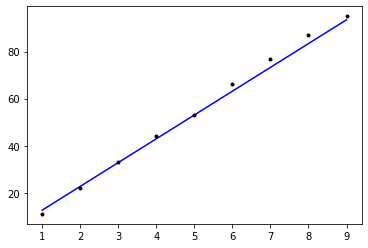

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [33]:
print(model.predict([9.5]))

[[98.55646]]


In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [35]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
13/13 [==============================] - 1s 1ms/step - loss: 0.6106 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5897 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5688 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5480 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5272 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5064 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4857 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4651 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4446 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==========================

13/13 [==============================] - 0s 2ms/step - loss: 0.0987 - binary_accuracy: 0.9231
Epoch 153/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0985 - binary_accuracy: 0.9231
Epoch 154/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0982 - binary_accuracy: 0.9231
Epoch 155/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0979 - binary_accuracy: 0.9231
Epoch 156/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0977 - binary_accuracy: 0.9231
Epoch 157/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0974 - binary_accuracy: 0.9231
Epoch 158/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0972 - binary_accuracy: 0.9231
Epoch 159/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0969 - binary_accuracy: 0.9231
Epoch 160/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0967 - binary_accuracy: 0.9231
Epoch 161/200
13/13 [=====================

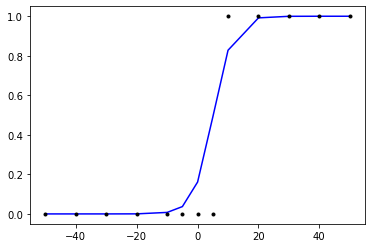

In [36]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [37]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.20970589]
 [0.26802748]
 [0.33567953]
 [0.41082355]
 [0.4502801 ]]
[[0.8691834 ]
 [0.99402523]
 [0.99976003]
 [0.9999904 ]
 [1.        ]]


In [38]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([73,82,72,57,34]) # 최종 성적

model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

# 학습률(learning rate, lr)은 0.00001로 합니다.
sgd=optimizers.SGD(lr=0.00001)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer = sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.
model.fit(X,y, batch_size=1, epochs=2000, shuffle=False)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
5/5 [==============================] - 0s 1ms/step - loss: 15922.7236 - mse: 15922.7236
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 2425.9653 - mse: 2425.9653
Epoch 3/2000
5/5 [==============================] - 0s 1ms/step - loss: 443.7263 - mse: 443.7263
Epoch 4/2000
5/5 [==============================] - 0s 2ms/step - loss: 130.3624 - mse: 130.3624
Epoch 5/2000
5/5 [==============================] - 0s 1ms/step - loss: 68.7421 - mse: 68.7421
Epoch 6/2000
5/5 [==============================] - 0s 1ms/step - loss: 49.2258 - mse: 49.2258
Epoch 7/2000
5/5 [==============================] - 0s 1ms/step - loss: 38.7712 - mse: 38.7712
Epoch 8/2000
5/5 [==============================] - 0s 1ms/step - loss: 31.3866 - mse: 31.3866
Epoch 9/2000
5/5 [==============================] - 0s 1ms/step - loss: 25.6448 - mse: 25.6448
Epoch 10/2000
5/5 [==============================] - 0s 997us/step - loss: 21.0381 - mse: 21.0381
Epoch 11/2000
5/5 [==============

5/5 [==============================] - 0s 2ms/step - loss: 0.4499 - mse: 0.4499
Epoch 173/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4483 - mse: 0.4483
Epoch 174/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4467 - mse: 0.4467
Epoch 175/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4451 - mse: 0.4451
Epoch 176/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4435 - mse: 0.4435
Epoch 177/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4420 - mse: 0.4420
Epoch 178/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4404 - mse: 0.4404
Epoch 179/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4388 - mse: 0.4388
Epoch 180/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4373 - mse: 0.4373
Epoch 181/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4357 - mse: 0.4357
Epoch 182/2000
5/5 [==============================] - 0s 1ms/step

5/5 [==============================] - 0s 2ms/step - loss: 0.2467 - mse: 0.2467
Epoch 344/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2458 - mse: 0.2458
Epoch 345/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2450 - mse: 0.2450
Epoch 346/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2441 - mse: 0.2441
Epoch 347/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2433 - mse: 0.2433
Epoch 348/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2424 - mse: 0.2424
Epoch 349/2000
5/5 [==============================] - ETA: 0s - loss: 0.4167 - mse: 0.416 - 0s 2ms/step - loss: 0.2416 - mse: 0.2416
Epoch 350/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2408 - mse: 0.2408
Epoch 351/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2399 - mse: 0.2399
Epoch 352/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2391 - mse: 0.2391
Epoch 353/2000
5/5 [=======

5/5 [==============================] - 0s 1ms/step - loss: 0.1388 - mse: 0.1388
Epoch 514/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1384 - mse: 0.1384
Epoch 515/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1379 - mse: 0.1379
Epoch 516/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1374 - mse: 0.1374
Epoch 517/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1370 - mse: 0.1370
Epoch 518/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1365 - mse: 0.1365
Epoch 519/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1361 - mse: 0.1361
Epoch 520/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1357 - mse: 0.1357
Epoch 521/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1352 - mse: 0.1352
Epoch 522/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1348 - mse: 0.1348
Epoch 523/2000
5/5 [==============================] - 0s 1ms/st

Epoch 685/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0807 - mse: 0.0807
Epoch 686/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0804 - mse: 0.0804
Epoch 687/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0802 - mse: 0.0802
Epoch 688/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0800 - mse: 0.0800
Epoch 689/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0797 - mse: 0.0797
Epoch 690/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0795 - mse: 0.0795
Epoch 691/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0792 - mse: 0.0792
Epoch 692/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0790 - mse: 0.0790
Epoch 693/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0788 - mse: 0.0788
Epoch 694/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0785 - mse: 0.0785
Epoch 695/2000
5/5 [==============================

Epoch 770/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0630 - mse: 0.0630
Epoch 771/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0629 - mse: 0.0629
Epoch 772/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0627 - mse: 0.0627
Epoch 773/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0625 - mse: 0.0625
Epoch 774/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0623 - mse: 0.0623
Epoch 775/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0622 - mse: 0.0622
Epoch 776/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0620 - mse: 0.0620
Epoch 777/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0618 - mse: 0.0618
Epoch 778/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0616 - mse: 0.0616
Epoch 779/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0615 - mse: 0.0615
Epoch 780/2000
5/5 [==============================

5/5 [==============================] - 0s 1ms/step - loss: 0.0405 - mse: 0.0405
Epoch 943/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404
Epoch 944/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404
Epoch 945/2000
5/5 [==============================] - ETA: 0s - loss: 0.0252 - mse: 0.025 - 0s 2ms/step - loss: 0.0403 - mse: 0.0403
Epoch 946/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0402 - mse: 0.0402
Epoch 947/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0401 - mse: 0.0401
Epoch 948/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0400 - mse: 0.0400
Epoch 949/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0399 - mse: 0.0399
Epoch 950/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0398 - mse: 0.0398
Epoch 951/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0397 - mse: 0.0397
Epoch 952/2000
5/5 [=======

5/5 [==============================] - 0s 1ms/step - loss: 0.0288 - mse: 0.0288
Epoch 1112/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0287 - mse: 0.0287
Epoch 1113/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0287 - mse: 0.0287
Epoch 1114/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0286 - mse: 0.0286
Epoch 1115/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0286 - mse: 0.0286
Epoch 1116/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0285 - mse: 0.0285
Epoch 1117/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0285 - mse: 0.0285
Epoch 1118/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0284 - mse: 0.0284
Epoch 1119/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0284 - mse: 0.0284
Epoch 1120/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0284 - mse: 0.0284
Epoch 1121/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.0252 - mse: 0.0252
Epoch 1197/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0251 - mse: 0.0251
Epoch 1198/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0251 - mse: 0.0251
Epoch 1199/2000
5/5 [==============================] - 0s 996us/step - loss: 0.0250 - mse: 0.0250
Epoch 1200/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0250 - mse: 0.0250
Epoch 1201/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0250 - mse: 0.0250
Epoch 1202/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249
Epoch 1203/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249
Epoch 1204/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249
Epoch 1205/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0248 - mse: 0.0248
Epoch 1206/2000
5/5 [==============================] -

5/5 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206    
Epoch 1365/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206    
Epoch 1366/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206    
Epoch 1367/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0206 - mse: 0.0206    
Epoch 1368/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0205 - mse: 0.0205    
Epoch 1369/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0205 - mse: 0.0205    
Epoch 1370/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0205 - mse: 0.0205    
Epoch 1371/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0205 - mse: 0.0205    
Epoch 1372/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0205 - mse: 0.0205    
Epoch 1373/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0204 - mse: 0.0204    
Epoch 1374/2000


5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1447/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1448/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1449/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1450/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1451/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1452/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0192    
Epoch 1453/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0191 - mse: 0.0191    
Epoch 1454/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0191 - mse: 0.0191    
Epoch 1455/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0191 - mse: 0.0191    
Epoch 1456/2000


5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1529/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1530/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1531/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0182 - mse: 0.0182  
Epoch 1532/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1533/2000
5/5 [==============================] - 0s 995us/step - loss: 0.0182 - mse: 0.0182  
Epoch 1534/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1535/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1536/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0182 - mse: 0.0182    
Epoch 1537/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0181 - mse: 0.0181    
Epoch 1538/2000


5/5 [==============================] - 0s 1ms/step - loss: 0.0170 - mse: 0.0170    
Epoch 1691/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0170 - mse: 0.0170    
Epoch 1692/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0170 - mse: 0.0170    
Epoch 1693/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0169 - mse: 0.0169    
Epoch 1694/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0169 - mse: 0.0169    
Epoch 1695/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0169 - mse: 0.0169    
Epoch 1696/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0169 - mse: 0.0169    
Epoch 1697/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0169 - mse: 0.0169  
Epoch 1698/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0169 - mse: 0.0169    
Epoch 1699/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0169 - mse: 0.0169    
Epoch 1700/2000


5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1857/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1858/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1859/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1860/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1861/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0163 - mse: 0.0163
Epoch 1862/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1863/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0162 - mse: 0.0162
Epoch 1864/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0162 - mse: 0.0162
Epoch 1865/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0162 - mse: 0.0162
Epoch 1866/2000
5/5 [==============================] -

In [39]:
print(model.predict(X))

[[72.94908 ]
 [81.966545]
 [72.05873 ]
 [57.1285  ]
 [33.780148]]


In [40]:
X_test = np.array([[20,99,10],[40,50,20]]) # 각각 58점과 56점을 예측해야 합니다.
print(model.predict(X_test))

[[57.89702 ]
 [56.003456]]


In [41]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y=np.array([0, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.

# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
model.fit(X, y, batch_size=1, epochs=800, shuffle=False)

Epoch 1/800
4/4 [==============================] - 0s 1ms/step - loss: 0.7373 - binary_accuracy: 0.2500
Epoch 2/800
4/4 [==============================] - 0s 1ms/step - loss: 0.7288 - binary_accuracy: 0.0000e+00
Epoch 3/800
4/4 [==============================] - 0s 1ms/step - loss: 0.7206 - binary_accuracy: 0.0000e+00
Epoch 4/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7126 - binary_accuracy: 0.0000e+00
Epoch 5/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7048 - binary_accuracy: 0.2500
Epoch 6/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6973 - binary_accuracy: 0.5000
Epoch 7/800
4/4 [==============================] - 0s 1ms/step - loss: 0.6900 - binary_accuracy: 0.7500
Epoch 8/800
4/4 [==============================] - 0s 2ms/step - loss: 0.6829 - binary_accuracy: 0.7500
Epoch 9/800
4/4 [==============================] - 0s 1ms/step - loss: 0.6761 - binary_accuracy: 0.7500
Epoch 10/800
4/4 [==============================] - 

Epoch 79/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4606 - binary_accuracy: 0.7500
Epoch 80/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4593 - binary_accuracy: 0.7500
Epoch 81/800
4/4 [==============================] - 0s 3ms/step - loss: 0.4580 - binary_accuracy: 0.7500
Epoch 82/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4568 - binary_accuracy: 0.7500
Epoch 83/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4555 - binary_accuracy: 0.7500
Epoch 84/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4543 - binary_accuracy: 0.7500
Epoch 85/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4531 - binary_accuracy: 0.7500
Epoch 86/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4519 - binary_accuracy: 0.7500
Epoch 87/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4507 - binary_accuracy: 0.7500
Epoch 88/800
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 2ms/step - loss: 0.3578 - binary_accuracy: 0.7500
Epoch 233/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3574 - binary_accuracy: 0.7500
Epoch 234/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3570 - binary_accuracy: 0.7500
Epoch 235/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3566 - binary_accuracy: 0.7500
Epoch 236/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3562 - binary_accuracy: 0.7500
Epoch 237/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3557 - binary_accuracy: 0.7500
Epoch 238/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3553 - binary_accuracy: 0.7500
Epoch 239/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3549 - binary_accuracy: 0.7500
Epoch 240/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3545 - binary_accuracy: 0.7500
Epoch 241/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.3032 - binary_accuracy: 0.7500
Epoch 387/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3029 - binary_accuracy: 0.7500
Epoch 388/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3026 - binary_accuracy: 0.7500
Epoch 389/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3023 - binary_accuracy: 0.7500
Epoch 390/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3020 - binary_accuracy: 0.7500
Epoch 391/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3017 - binary_accuracy: 0.7500
Epoch 392/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3014 - binary_accuracy: 0.7500
Epoch 393/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3011 - binary_accuracy: 0.7500
Epoch 394/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3009 - binary_accuracy: 0.7500
Epoch 395/800
4/4 [==============================] - 0s 3ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2626 - binary_accuracy: 1.0000
Epoch 541/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2623 - binary_accuracy: 1.0000
Epoch 542/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2621 - binary_accuracy: 1.0000
Epoch 543/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2619 - binary_accuracy: 1.0000
Epoch 544/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2616 - binary_accuracy: 1.0000
Epoch 545/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2614 - binary_accuracy: 1.0000
Epoch 546/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2612 - binary_accuracy: 1.0000
Epoch 547/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2609 - binary_accuracy: 1.0000
Epoch 548/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2607 - binary_accuracy: 1.0000
Epoch 549/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - binary_accuracy: 1.0000
Epoch 694/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2308 - binary_accuracy: 1.0000
Epoch 695/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - binary_accuracy: 1.0000
Epoch 696/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2305 - binary_accuracy: 1.0000
Epoch 697/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2303 - binary_accuracy: 1.0000
Epoch 698/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2301 - binary_accuracy: 1.0000
Epoch 699/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2299 - binary_accuracy: 1.0000
Epoch 700/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2297 - binary_accuracy: 1.0000
Epoch 701/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2296 - binary_accuracy: 1.0000
Epoch 702/800
4/4 [==============================] - 0s 3ms/

In [42]:
print(model.predict(X))

[[0.4095187 ]
 [0.8593422 ]
 [0.85827786]
 [0.9816003 ]]


In [55]:
import pandas as pd
data = pd.read_csv('iris.csv',encoding='latin1')
print(len(data)) # 총 샘플의 개수 출력
print(data[:5]) # 샘플 중 5개 출력

150
   sepallength  sepalwidth  petallength  petalwidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [61]:
print("품종 종류:", data["Species"].unique(), sep="\n")
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


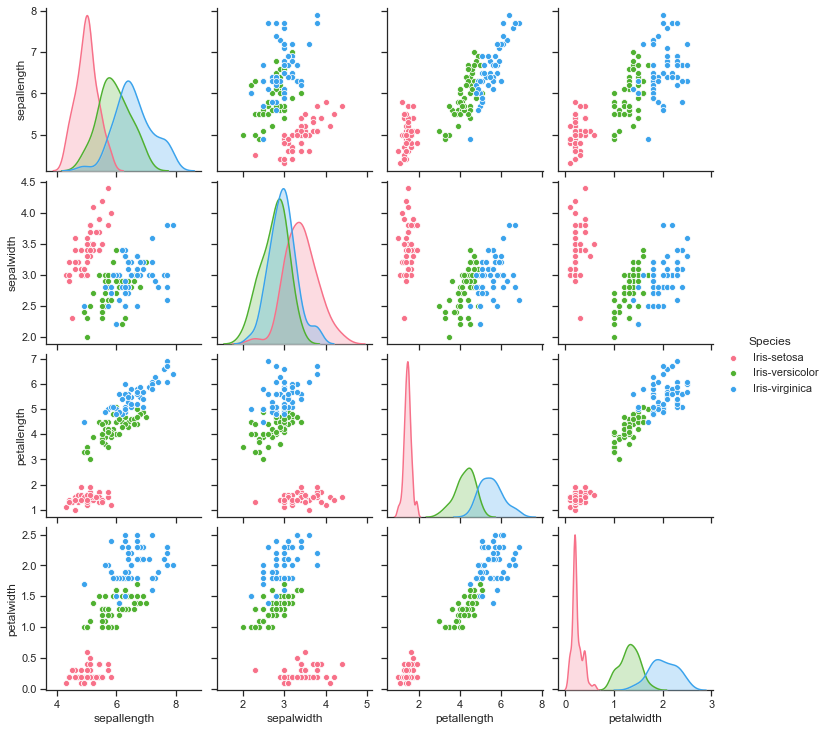

In [62]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

<AxesSubplot:xlabel='Species', ylabel='sepalwidth'>

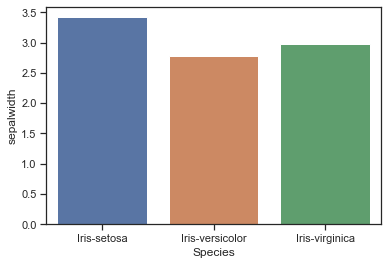

In [65]:
sns.barplot(data['Species'], data['sepalwidth'], ci=None)
# 각 종과 특성에 대한 연관 관계

<AxesSubplot:>

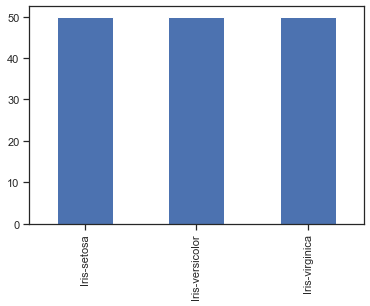

In [66]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

<AxesSubplot:>

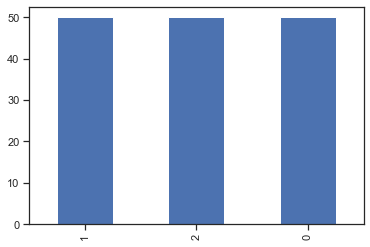

In [67]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'].value_counts().plot(kind='bar')

In [69]:
from sklearn.model_selection import train_test_split
data_X = data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['Species'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [70]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [71]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
120/120 [==============================] - 1s 3ms/step - loss: 1.7373 - accuracy: 0.2833 - val_loss: 1.5832 - val_accuracy: 0.4000
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 1.5083 - accuracy: 0.1417 - val_loss: 1.4834 - val_accuracy: 0.2000
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.3815 - accuracy: 0.1417 - val_loss: 1.3799 - val_accuracy: 0.1333
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.2781 - accuracy: 0.1417 - val_loss: 1.2872 - val_accuracy: 0.1000
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.1943 - accuracy: 0.1833 - val_loss: 1.2220 - val_accuracy: 0.1333
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 1.1182 - accuracy: 0.2167 - val_loss: 1.1074 - val_accuracy: 0.1000
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 1.0482 - accuracy: 0.2250 - val_loss: 1.0784 - val_accuracy: 0.1667

Epoch 58/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8667 - val_loss: 0.4027 - val_accuracy: 0.8000
Epoch 59/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8833 - val_loss: 0.3964 - val_accuracy: 0.8000
Epoch 60/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8917 - val_loss: 0.4042 - val_accuracy: 0.8000
Epoch 61/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.9000 - val_loss: 0.3970 - val_accuracy: 0.8000
Epoch 62/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.9083 - val_loss: 0.4122 - val_accuracy: 0.8000
Epoch 63/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8417 - val_loss: 0.3993 - val_accuracy: 0.8000
Epoch 64/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.9083 - val_loss: 0.3849 - val_accuracy:

Epoch 115/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9583 - val_loss: 0.2936 - val_accuracy: 0.9000
Epoch 116/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.9417 - val_loss: 0.2848 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.9583 - val_loss: 0.2901 - val_accuracy: 0.9000
Epoch 118/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9333 - val_loss: 0.2816 - val_accuracy: 0.9333
Epoch 119/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.9417 - val_loss: 0.2775 - val_accuracy: 0.9333
Epoch 120/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.9583 - val_loss: 0.2867 - val_accuracy: 0.9000
Epoch 121/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.9583 - val_loss: 0.2830 - val_ac

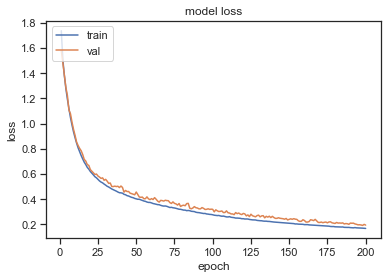

In [72]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [73]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 198ms/step - loss: 0.1940 - accuracy: 1.0000

 테스트 정확도: 1.0000


# 딥러닝

In [74]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [75]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [76]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [77]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [78]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [79]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

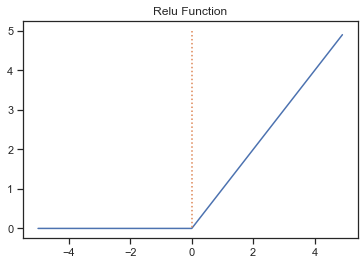

In [80]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

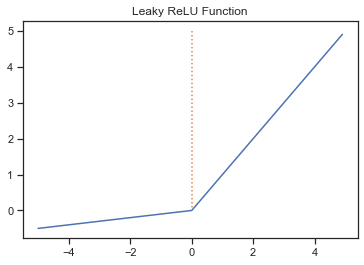

In [81]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

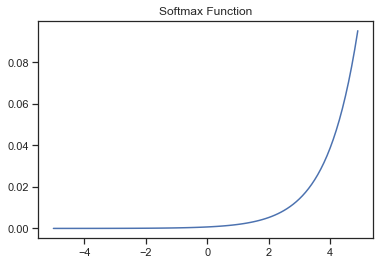

In [82]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

In [7]:
from tensorflow.keras import optimizers
Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
t  = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text])

test_text = "The earth is an great place live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences : ",sequences) # great는 단어 집합(vocabulary)에 없으므로 출력되지 않는다.
print("word_index : ",t.word_index) # 단어 집합(vocabulary) 출력

sequences :  [1, 2, 3, 4, 6, 7]
word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')
# 전처리가 끝나서 각 단어에 대한 정수 인코딩이 끝났다고 가정하고, 3개의 데이터를 입력으로 합니다.

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# 텐서를 리턴한다.
inputs = Input(shape=(10,))

In [15]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

In [16]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

In [18]:
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

In [19]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
linear_model.fit(X, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 1s 1ms/step - loss: 399.2339 - mse: 399.2339
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3365 - mse: 2.3365
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3293 - mse: 2.3293
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3225 - mse: 2.3225
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3159 - mse: 2.3159
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3096 - mse: 2.3096
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3036 - mse: 2.3036
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2978 - mse: 2.2978
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2922 - mse: 2.2922
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2868 - mse: 2.2868
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 2.2

9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 175/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 176/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 178/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 179/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 180/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1464 - mse: 2.1464
Epoch 181/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1464 - mse: 2.1464
Epoch 182/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1464 - mse: 2.1464
Epoch 183/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1464 - mse: 2.1464
Epoch 184/300
9/9 [==============================] - 0s 2ms/step - loss: 2

In [20]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

In [21]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

In [22]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs) # RNN의 일종인 LSTM을 사용
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)

In [23]:
import tensorflow as tf

In [26]:
class LinearRegression(tf.keras.Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

    def call(self, x):
        y_pred = self.linear_layer(x)

        return y_pred

In [27]:
model = LinearRegression()

In [28]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [29]:
# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = tf.keras.optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 299.4044 - mse: 299.4044
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1377 - mse: 2.1377
Epoch 3/300
9/9 [==============================] - 0s 997us/step - loss: 2.1380 - mse: 2.1380
Epoch 4/300
9/9 [==============================] - 0s 997us/step - loss: 2.1383 - mse: 2.1383
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1385 - mse: 2.1385
Epoch 6/300
9/9 [==============================] - 0s 997us/step - loss: 2.1388 - mse: 2.1388
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1390 - mse: 2.1390
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1392 - mse: 2.1392
Epoch 9/300
9/9 [==============================] - 0s 998us/step - loss: 2.1395 - mse: 2.1395
Epoch 10/300
9/9 [==============================] - 0s 997us/step - loss: 2.1397 - mse: 2.1397
Epoch 11/300
9/9 [==============================] - 0s 998us/step

Epoch 174/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 175/300
9/9 [==============================] - 0s 873us/step - loss: 2.1460 - mse: 2.1460
Epoch 176/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 178/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 179/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 180/300
9/9 [==============================] - 0s 997us/step - loss: 2.1460 - mse: 2.1460
Epoch 181/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 182/300
9/9 [==============================] - 0s 997us/step - loss: 2.1460 - mse: 2.1460
Epoch 183/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1460 - mse: 2.1460
Epoch 184/300
9/9 [==============================] - 0

In [30]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [31]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [32]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [33]:
print(t.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [34]:
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [35]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [36]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [2]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [3]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [5]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [8]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [9]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [10]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [12]:
data.isnull().values.any()

False

In [13]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


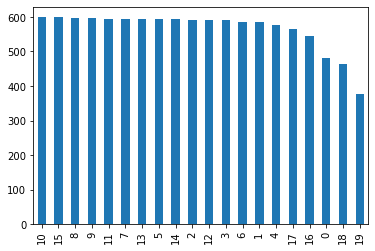

In [14]:
data['target'].value_counts().plot(kind='bar');

In [15]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [16]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [17]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [18]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [19]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [20]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [21]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [25]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 27ms/step - loss: 2.3211 - accuracy: 0.3302 - val_loss: 0.9848 - val_accuracy: 0.8463
Epoch 2/5
80/80 [==============================] - 2s 25ms/step - loss: 0.9037 - accuracy: 0.7570 - val_loss: 0.4565 - val_accuracy: 0.8905
Epoch 3/5
80/80 [==============================] - 2s 27ms/step - loss: 0.4411 - accuracy: 0.8860 - val_loss: 0.3516 - val_accuracy: 0.9046
Epoch 4/5
80/80 [==============================] - 2s 25ms/step - loss: 0.2624 - accuracy: 0.9319 - val_loss: 0.3096 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 2s 24ms/step - loss: 0.1687 - accuracy: 0.9609 - val_loss: 0.2830 - val_accuracy: 0.9187
binary 모드의 테스트 정확도: 0.8303239345550537
Epoch 1/5
80/80 [==============================] - 3s 29ms/step - loss: 2.6925 - accuracy: 0.2565 - val_loss: 1.5439 - val_accuracy: 0.7270
Epoch 2/5
80/80 [==============================] - 2s 25ms/step - loss: 1.3897 - accuracy: 0.6380 - val_loss: 0.6840 - va

# Word2Vec

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Yuyeon
[nltk_data]     PARK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [28]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x21c1c7f5748>)

In [29]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
        normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [30]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [31]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [34]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
# 만약 TypeError: __init__() got an unexpected keyword argument 'size' 라는 에러 발생 시에는
# size 대신 vector_size로 바꿔서 적어주세요.

In [35]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8472483158111572), ('guy', 0.7941356301307678), ('lady', 0.7854869961738586), ('boy', 0.7614998817443848), ('girl', 0.7498319745063782), ('gentleman', 0.7350730299949646), ('poet', 0.7222418189048767), ('soldier', 0.7220936417579651), ('kid', 0.705239474773407), ('son', 0.6812551617622375)]


In [36]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [37]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8472483158111572), ('guy', 0.7941356301307678), ('lady', 0.7854869961738586), ('boy', 0.7614998817443848), ('girl', 0.7498319745063782), ('gentleman', 0.7350730299949646), ('poet', 0.7222418189048767), ('soldier', 0.7220936417579651), ('kid', 0.705239474773407), ('son', 0.6812551617622375)]


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [39]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x21c5a9abb48>)

In [40]:
train_data = pd.read_table('ratings.txt')

In [41]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [42]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [43]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [44]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [45]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [46]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [47]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [48]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [49]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [53]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [54]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [55]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [56]:
print(X_train[0]) # 첫번째 훈련용 뉴스 기사
print(y_train[0]) # 첫번째 훈련용 뉴스 기사의 레이블

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


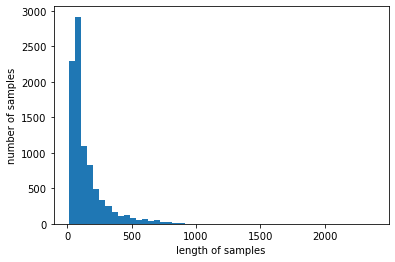

In [57]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

<AxesSubplot:ylabel='count'>

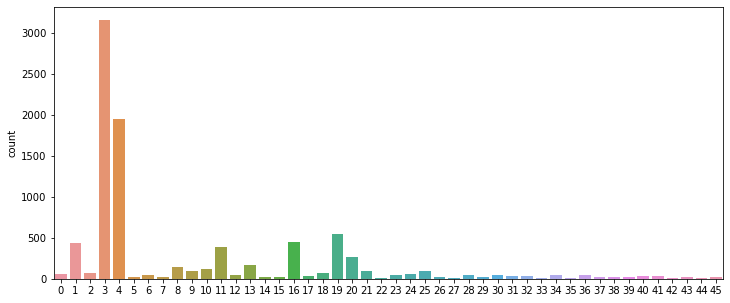

In [58]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [59]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
# label_cnt=dict(zip(unique_elements, counts_elements))
# 아래의 출력 결과가 보기 불편하여 병렬로 보고싶다면 위의 label_cnt를 출력

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [60]:
word_to_index = reuters.get_word_index()
print(word_to_index)

557056/550378 [==============================] - 0s 0us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [61]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [62]:
print('빈도수 상위 28842번 단어 : {}'.format(index_to_word[28842]))

빈도수 상위 28842번 단어 : nondiscriminatory


In [63]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))

빈도수 상위 1번 단어 : the


In [66]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [67]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [68]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [69]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [70]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [71]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [72]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [74]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - 20s 239ms/step - loss: 2.6265 - acc: 0.3521 - val_loss: 2.3989 - val_acc: 0.3620

Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
Epoch 2/30
71/71 [==============================] - 16s 222ms/step - loss: 2.1537 - acc: 0.4556 - val_loss: 2.0145 - val_acc: 0.5009

Epoch 00002: val_acc improved from 0.36198 to 0.50089, saving model to best_model.h5
Epoch 3/30
71/71 [==============================] - 15s 215ms/step - loss: 1.9181 - acc: 0.5145 - val_loss: 1.7720 - val_acc: 0.5543

Epoch 00003: val_acc improved from 0.50089 to 0.55432, saving model to best_model.h5
Epoch 4/30
71/71 [==============================] - 15s 217ms/step - loss: 1.7212 - acc: 0.5578 - val_loss: 1.7235 - val_acc: 0.5668

Epoch 00004: val_acc improved from 0.55432 to 0.56679, saving model to best_model.h5
Epoch 5/30
71/71 [==============================] - 16s 221ms/step - loss: 1.6526 - acc: 0.5745 - val_loss: 1.6806 - val_acc: 0

In [75]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 5s 51ms/step - loss: 1.1880 - acc: 0.7137

 테스트 정확도: 0.7137


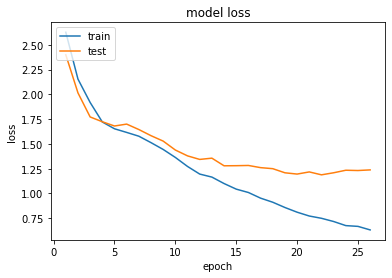

In [76]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
!pip install modin
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53455 sha256=7744e29abcceee8f0801a38e19229cbddedd92693bbcc2256d5175399ca09261
  Stored in directory: c:\users\yuyeon park\appdata\local\pip\cache\wheels\9d\16\3a\9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [8]:
from koalanlp.Util import initialize, finalize
from koalanlp.proc import Parser
from koalanlp import API

initialize(HNN='2.0.4')  #: HNN=2.0.4, ETRI=2.0.4

parser = Parser(API.HNN)

while True:
    text = input("분석할 문장을 입력하세요>> ").strip()

    if len(text) == 0:
        break

    sentences = parser(text)

    for sent in sentences:
        print("===== Sentence =====")
        print(sent.singleLineString())
        print("# Dependency Parse result")

        dependencies = sent.getDependencies()
        if len(dependencies) > 0:
            for edge in dependencies:
                print("[%s]는 [%s]의 %s-%s" % (edge.getDependent().getSurface(),
                                             edge.getGovernor().getSurface() if edge.getGovernor() is not None else "ROOT",
                                             str(edge.getType()),
                                             str(edge.getDepType())))
        else:
            print("(Unexpected) NULL!")

finalize()

[root] Java gateway started with port number 6344
[root] Callback server will use port number 25334
[koalanlp.jip] JVM initialization procedure is completed.


분석할 문장을 입력하세요>> 상담원의 태도는 매우 친절하지만 알맹이가 없고 원하는 내용을 설명해주질 못하시네요.


Py4JError: An error occurred while calling o211.hasNext. Trace:
java.lang.reflect.InaccessibleObjectException: Unable to make public boolean java.util.ArrayList$Itr.hasNext() accessible: module java.base does not "opens java.util" to unnamed module @51263a27
	at java.base/java.lang.reflect.AccessibleObject.checkCanSetAccessible(AccessibleObject.java:357)
	at java.base/java.lang.reflect.AccessibleObject.checkCanSetAccessible(AccessibleObject.java:297)
	at java.base/java.lang.reflect.Method.checkCanSetAccessible(Method.java:199)
	at java.base/java.lang.reflect.Method.setAccessible(Method.java:193)
	at py4j.reflection.MethodInvoker$1.run(MethodInvoker.java:240)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:312)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:238)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:831)

